In [1]:
import numpy as np
import pandas as pd
import metachange
from datetime import datetime
from tqdm import tqdm
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import os
os.environ["PATH"] += os.pathsep + "C://Program Files//Graphviz//bin//"

pd.set_option('display.max_columns', None)

In [2]:
X = np.array([[0,1]]*500 + [[1,0]]*500 + [[2,0]]*500 + [[2,1]]*500)
t = np.arange(2000)*1./2000

In [3]:
# clf_rf = RandomForestClassifier(max_depth=32, criterion="entropy", random_state=0)
# res_rf = metachange.meta_change_detect_np(X, t, clf_rf)

In [4]:
clf_rf = RandomForestClassifier(max_depth=32, criterion="entropy", random_state=0)
res_multi, res_multi_result = metachange.change_point_tree(X, t, clf_rf, min_range=0.10)

{'t_left': 0.0, 't_right': 0.9995}
trial   0
t0 = 0.5068, alpha = 1.0000
trial   1
t0 = 0.4988, alpha = 1.0000
trial   2
t0 = 0.5035, alpha = 1.0000
t0 = 0.5031 +- 0.0033
alpha = 1.0000 +- 0.0000
ratio =  0.5032516258129065
{'t_left': 0.0, 't_right': 0.5030550564807482}
trial   0
t0 = 0.2484, alpha = 1.0000
trial   1
t0 = 0.2428, alpha = 0.9692
trial   2
t0 = 0.2612, alpha = 1.0000
t0 = 0.2508 +- 0.0077
alpha = 0.9897 +- 0.0145
ratio =  0.49801192842942343
{'t_left': 0.5030550564807482, 't_right': 0.9995}
trial   0
t0 = 0.7453, alpha = 1.0000
trial   1
t0 = 0.7514, alpha = 1.0000
trial   2
t0 = 0.7433, alpha = 1.0000
t0 = 0.7467 +- 0.0034
alpha = 1.0000 +- 0.0000
ratio =  0.4904330312185297
{'t_left': 0.0, 't_right': 0.2508004594327536}
trial   0
t0 = 0.2450, alpha = 0.1361
trial   1
t0 = 0.2249, alpha = 0.4323
trial   2
t0 = 0.0204, alpha = 0.5990
t0 = 0.1634 +- 0.1015
alpha = 0.3891 +- 0.1914
{'t_left': 0.2508004594327536, 't_right': 0.5030550564807482}
trial   0
t0 = 0.2822, alpha =

In [5]:
print(res_multi_result)

[{'t0_mean': 0.5030550564807482, 't0_std': 0.003301346746373138, 'alpha_mean': 1.0, 'alpha_std': 0.0}, {'t0_mean': 0.2508004594327536, 't0_std': 0.007673824984639071, 'alpha_mean': 0.9897372657381172, 'alpha_std': 0.014513697980185753}, {'t0_mean': 0.7466830100308722, 't0_std': 0.0034082838437939555, 'alpha_mean': 1.0, 'alpha_std': 0.0}]


In [6]:
res_multi

{'depth': 0,
 'left': {'depth': 1,
  'left': {'depth': 2,
   'left': None,
   'right': None,
   'data': {'t_left': 0.0, 't_right': 0.2508004594327536}},
  'right': {'depth': 2,
   'left': None,
   'right': None,
   'data': {'t_left': 0.2508004594327536, 't_right': 0.5030550564807482}},
  'data': {'t_left': 0.0,
   't_right': 0.5030550564807482,
   't0': 0.2508004594327536,
   'ratio': 0.49801192842942343,
   'alpha': 0.9897372657381172,
   'res': [{'lbd': [0.046181818181818185,
      0.09186363636363637,
      0.13754545454545455,
      0.18322727272727274,
      0.22890909090909092,
      0.2745909090909091,
      0.3202727272727273,
      0.3659545454545455,
      0.41163636363636363,
      0.45731818181818185],
     'acc': [0.9306930693069307,
      0.8366336633663366,
      0.7821782178217822,
      0.8861386138613861,
      0.9702970297029703,
      0.9455445544554455,
      0.8663366336633663,
      0.7871287128712872,
      0.7871287128712872,
      0.8960396039603961],
     'ma

In [7]:
## define a funciton which generates node text
def make_node_text(data):
    t_left = data["t_left"]
    t_right = data["t_right"]

    if "t0" in data:
        header = f't_0 = {data["t0"]:.4f}\n alpha = {data["alpha"]:.4f}'
    else:
        header = "Leaf"
    return f"{header}\nRange:{t_left:.4f}-{t_right:.4f}"


tree = metachange.show_tree(res_multi, make_node_text)

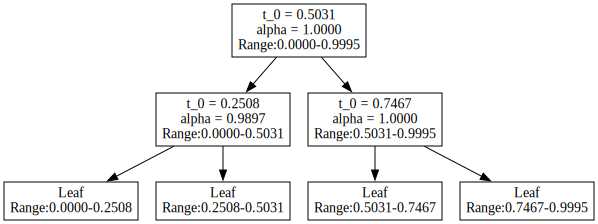

In [8]:
tree

In [9]:
tree_str = tree.source

In [10]:
tree_str

'digraph {\n\tnode [shape=box]\n\t0 [label=root]\n\t0 [label="t_0 = 0.5031\n alpha = 1.0000\nRange:0.0000-0.9995"]\n\t1 [label=1]\n\t0 -> 1\n\t1 [label="t_0 = 0.2508\n alpha = 0.9897\nRange:0.0000-0.5031"]\n\t2 [label=2]\n\t1 -> 2\n\t2 [label="Leaf\nRange:0.0000-0.2508"]\n\t3 [label=3]\n\t1 -> 3\n\t3 [label="Leaf\nRange:0.2508-0.5031"]\n\t4 [label=4]\n\t0 -> 4\n\t4 [label="t_0 = 0.7467\n alpha = 1.0000\nRange:0.5031-0.9995"]\n\t5 [label=5]\n\t4 -> 5\n\t5 [label="Leaf\nRange:0.5031-0.7467"]\n\t6 [label=6]\n\t4 -> 6\n\t6 [label="Leaf\nRange:0.7467-0.9995"]\n}\n'

In [11]:
tree_str

'digraph {\n\tnode [shape=box]\n\t0 [label=root]\n\t0 [label="t_0 = 0.5031\n alpha = 1.0000\nRange:0.0000-0.9995"]\n\t1 [label=1]\n\t0 -> 1\n\t1 [label="t_0 = 0.2508\n alpha = 0.9897\nRange:0.0000-0.5031"]\n\t2 [label=2]\n\t1 -> 2\n\t2 [label="Leaf\nRange:0.0000-0.2508"]\n\t3 [label=3]\n\t1 -> 3\n\t3 [label="Leaf\nRange:0.2508-0.5031"]\n\t4 [label=4]\n\t0 -> 4\n\t4 [label="t_0 = 0.7467\n alpha = 1.0000\nRange:0.5031-0.9995"]\n\t5 [label=5]\n\t4 -> 5\n\t5 [label="Leaf\nRange:0.5031-0.7467"]\n\t6 [label=6]\n\t4 -> 6\n\t6 [label="Leaf\nRange:0.7467-0.9995"]\n}\n'

In [12]:
split_str = tree_str.split()